In [2]:
import util
import numpy as np

filename = "../data/train_cleaned.csv"

data = util.load(filename)

train_x, train_y = data[0]
valid_x, valid_y = data[1]
test_x, test_y = data[2]

train_val_x = np.concatenate((train_x, valid_x), axis=0)
train_val_y = np.concatenate((train_y, valid_y), axis=0)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix


solvers = ['saga']
for s in solvers:
    clf = LogisticRegression(max_iter=100000,solver=s, multi_class='multinomial', penalty='elasticnet', l1_ratio=0.7)
    clf.fit(train_val_x, train_val_y)
    train_score = clf.score(train_x,train_y)
    test_score = clf.score(test_x, test_y)
    y_pred = clf.predict(test_x)
    print(f"{s} accuracy on training: {train_score} test: {test_score}")
    print(confusion_matrix(test_y, y_pred))

saga accuracy on training: 0.8189806678383128 test: 0.7865168539325843
[[91 13]
 [25 49]]


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
# param_grid = [    
#     {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#     'C' : np.logspace(1e-5, 1e5, 20),
#     'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
#     'max_iter' : [100, 1000, 10000]
#     }
# ]
param_grid = [    
    {
    'solver' : ['lbfgs','saga'], 
    'C' : np.logspace(1e-5, 1e5, 20),
    'max_iter' : [1000] 
    }
]

clf = GridSearchCV(model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(train_val_x, train_val_y)

C:\Users\seit-\miniconda3\envs\cps803\lib\site-packages\numpy\core\function_base.py:265: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y)


Fitting 3 folds for each of 40 candidates, totalling 120 fits


In [18]:
best_clf.best_estimator_

LogisticRegression(C=1.0000230261160268, max_iter=1000)

In [19]:
print (f'Accuracy Train : {best_clf.score(train_val_x, train_val_y):.3f}')
print (f'Accuracy Test  : {best_clf.score(test_x, test_y):.3f}')

Accuracy Train : 0.800
Accuracy Test  : 0.803


In [29]:
model_final = LogisticRegression(C=0.3343543, max_iter=10000, solver='saga')
model_final.fit(train_val_x, train_val_y)
print (f'Accuracy Train : {model_final.score(train_val_x, train_val_y):.3f}')
print (f'Accuracy Test  : {model_final.score(test_x, test_y):.3f}')

Accuracy Train : 0.810
Accuracy Test  : 0.803


In [25]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=100, min_samples_split=2)
clf.fit(train_val_x, train_val_y)
rain_score = clf.score(train_x,train_y)
test_score = clf.score(test_x, test_y)
y_pred = clf.predict(test_x)
print(f"{s} accuracy on training: {train_score} test: {test_score}")
print(confusion_matrix(test_y, y_pred))

saga accuracy on training: 0.8189806678383128 test: 0.8146067415730337
[[90 14]
 [19 55]]
(178,)
(178,)


In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.regularizers import l2
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(24, input_dim=train_x.shape[1], activation='relu'))
model.add(Dense(4, activation='relu',kernel_regularizer=l2(0.2), bias_regularizer=l2(0.01)))
model.add(Dense(4, activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
opt = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit the keras model on the dataset
lr_model_history = model.fit(train_val_x, train_val_y, epochs=1000, batch_size=1, validation_data=(test_x, test_y))

# evaluate the keras model
_, accuracy = model.evaluate(test_x, test_y)
print('Accuracy: %.2f' % (accuracy*100))

y_pred = (model.predict(test_x).flatten() > 0.5).astype(int)
confusion_matrix(test_y, y_pred)

Epoch 1/1000
711/711 [==============================] - 2s 1ms/step - loss: 2.1645 - accuracy: 0.6757 - val_loss: 1.0329 - val_accuracy: 0.7303
Epoch 2/1000
711/711 [==============================] - 1s 1ms/step - loss: 0.9863 - accuracy: 0.7019 - val_loss: 0.8702 - val_accuracy: 0.7022
Epoch 3/1000
711/711 [==============================] - 1s 1ms/step - loss: 0.8425 - accuracy: 0.6451 - val_loss: 0.7697 - val_accuracy: 0.7079
Epoch 4/1000
711/711 [==============================] - 1s 1ms/step - loss: 0.7384 - accuracy: 0.6849 - val_loss: 0.7069 - val_accuracy: 0.6966
Epoch 5/1000
711/711 [==============================] - 1s 1ms/step - loss: 0.7190 - accuracy: 0.6860 - val_loss: 0.6748 - val_accuracy: 0.7135
Epoch 6/1000
711/711 [==============================] - 1s 1ms/step - loss: 0.6728 - accuracy: 0.6685 - val_loss: 0.6438 - val_accuracy: 0.7079
Epoch 7/1000
711/711 [==============================] - 1s 1ms/step - loss: 0.6540 - accuracy: 0.6754 - val_loss: 0.6254 - val_accuracy:

array([[94, 10],
       [28, 46]], dtype=int64)

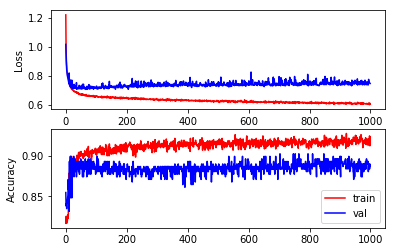

In [31]:
import matplotlib.pyplot as plt

plt.subplot(2, 1, 1)
plt.plot(np.sqrt(lr_model_history.history['loss']), 'r', label='train')
plt.plot(np.sqrt(lr_model_history.history['val_loss']), 'b' ,label='val')
plt.ylabel("Loss")

plt.subplot(2, 1, 2)
plt.plot(np.sqrt(lr_model_history.history['accuracy']), 'r', label='train')
plt.plot(np.sqrt(lr_model_history.history['val_accuracy']), 'b' ,label='val')
plt.ylabel("Accuracy")

plt.legend()
#plt.show()